In [1]:
!pip install pyod

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 75.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 22.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 89.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [pyod]2m12/14 [matplotlib]n]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest

In [2]:
parks_path = 'parks.csv'
reports_path = 'reports.csv'
df_parks = pd.read_csv(parks_path)
df_reports = pd.read_csv(reports_path)

In [3]:

# define our detect|ors
detectors = {
    'KNN': KNN(contamination=0.05),
    'LOF': LOF(contamination=0.05),
    'IsolationForest': IForest(contamination=0.05)
}




In [8]:
from matplotlib import font_manager


In [12]:
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/Supplemental/Arial Narrow.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf',
 '/Users/vxlmlxv/Library/Fonts/CDType - Voga Medium.otf',
 '/System/Library/Fonts/Supplemental/Cochin.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntUpBol.otf',
 '/System/Library/Fonts/Supplemental/BigCaslon.ttf',
 '/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc',
 '/Users/vxlmlxv/Library/Fonts/Pretendard-Regular.otf',
 '/System/Library/Fonts/Supplemental/Herculanum.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifYezidi-Regular.otf',
 '/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/a8805b853edf89283dec908153a0015bdd1d00f8.asset/AssetData/WeibeiSC-Bold.otf',
 '/System/Library/Fonts/Supplemental/Courier New.ttf',
 '/System/Library/AssetsV2/com_apple_MobileAsset_Font7/aa99d0b2bad7f797f38b49d46cde28fd4b58876e.asset/Asset

In [15]:
fe = font_manager.FontEntry(fname=r'/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic')
font_manager.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [9]:
df_parks.head()

,주소,총주차면,평일유료,토요일유료,공휴일유료,평일시작,평일종료,토요일시작,토요일종료,공휴일시작,공휴일종료,경도,위도
0,도봉구 창동 24-0,71.0,Y,N,N,09:00:00,19:00:00,09:00:00,19:00:00,09:00:00,19:00:00,127.051008,37.653485
1,노원구 상계동 770-2,177.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,127.057986,37.643675
2,성동구 마장동 463-2,54.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,127.035104,37.569968
3,영등포구 당산동3가 385-0,190.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,126.895778,37.525545
4,영등포구 대림동 780-0,192.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,126.894445,37.499238


In [10]:
df_reports.head()

,민원접수일,민원접수시간,주소,경도,위도,요일
0,2021-09-29,19:29:00,서울특별시 강서구 강서로15길 49,126.843247,37.532089,Weekday
1,2021-09-29,00:05:00,서울 강서구 화곡로66길 130,126.859911,37.555537,Weekday
2,2021-09-29,00:38:00,중구 다산로48길 33 단우물어린이집앞,127.018013,37.567483,Weekday
3,2021-09-29,00:38:00,서울특별시 중구 마장로 19,127.012793,37.569183,Weekday
4,2021-09-29,00:50:00,서울특별시 강서구 까치산로15길 21,126.847125,37.547040,Weekday


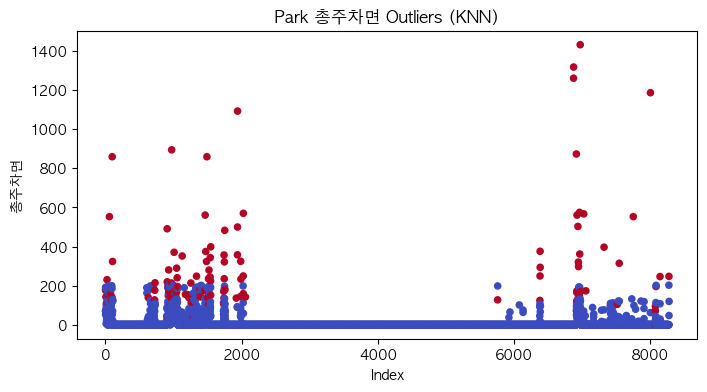

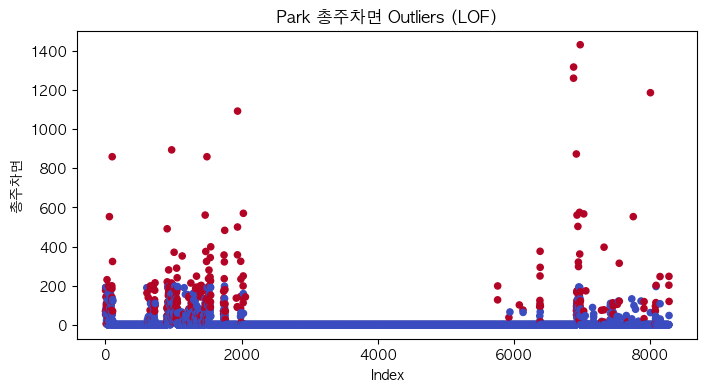

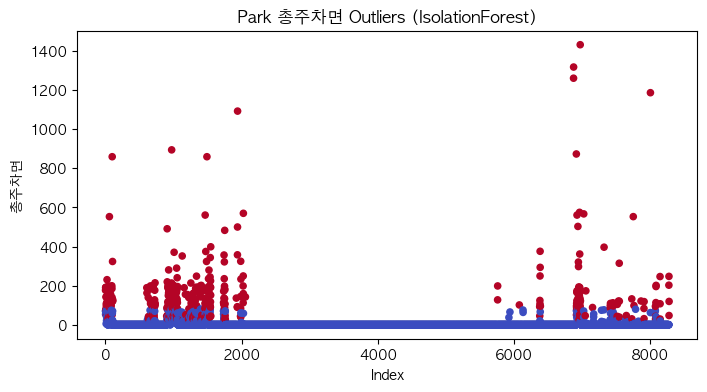

In [16]:
# 1) df_parks['총주차면']
X_parks = df_parks[['총주차면']].values
for name, clf in detectors.items():
    clf.fit(X_parks)
    df_parks[f'{name}_outlier'] = clf.labels_
    plt.figure(figsize=(8,4))
    plt.scatter(np.arange(len(X_parks)), X_parks, c=clf.labels_, cmap='coolwarm', s=20)
    plt.title(f'Park 총주차면 Outliers ({name})')
    plt.xlabel('Index'); plt.ylabel('총주차면')
    plt.show()